In [1]:
import pandas as pd # 导入另一个包“pandas” 命名为 pd，理解成pandas是在 numpy 基础上的升级包
import numpy as np #导入一个数据分析用的包“numpy” 命名为 np
import matplotlib.pyplot as plt # 导入 matplotlib 命名为 plt，类似 matlab，集成了许多可视化命令
import math
from scipy import stats
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [2]:
def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

In [3]:

data = pd.read_csv("总表.csv")
data = data[['standard distances','actual distances']]
groupByStandardD = data.groupby('standard distances', sort=True)
meanStd = {}
realData = {}
# name: 标准值
# groupData: 标准值对应的实际值，比如说90度的可能实际检测到的是91度
for name, groupData in groupByStandardD:
#     print(name)
#     print(groupData)
    mean = np.array(groupData['actual distances']).mean()
    std = np.array(groupData['actual distances']).std(ddof=1)
    realData[name] = groupData['actual distances']
    meanStd[name] = [mean, std]
for key in realData.keys():
    print(f'{key}:{len(realData[key])}')

1.0:155
1.4142135623730951:90
2.0:78
2.23606797749979:109
2.8284271247461903:12


{1.0: [1.176678190979083, 0.3136832516435934], 1.4142135623730951: [1.5852509604013445, 0.36925879405047407], 2.0: [2.0851253159612164, 0.6431215334907057], 2.23606797749979: [2.3963727698937496, 0.4632285289663361], 2.8284271247461903: [3.0347462914865644, 0.8504000161896887]}


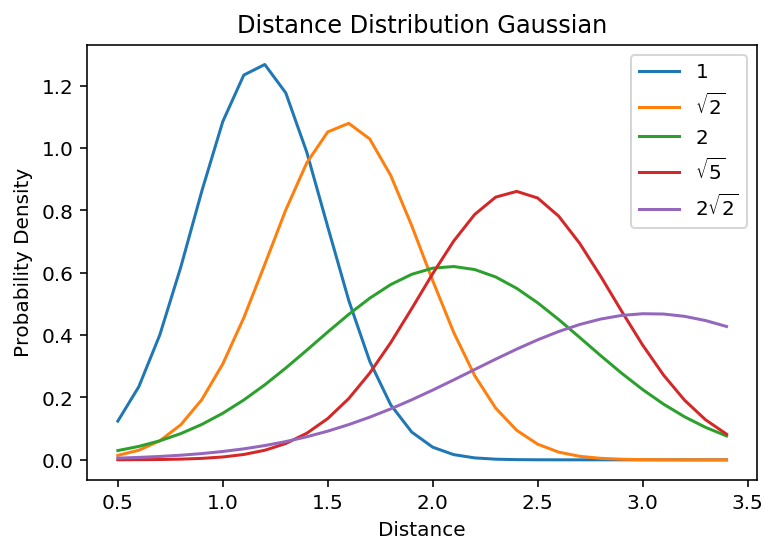

In [4]:
print(meanStd)
# 设定 x 轴前两个数字是 X 轴的开始和结束，第三个数字表示步长，或者区间的间隔长度
x = np.arange(0.5,3.5,0.1) 
y = normfun(x, meanStd[1][0], meanStd[1][1])

plt.plot(x,y,label=r'$1$')

y = normfun(x, meanStd[math.sqrt(2)][0], meanStd[math.sqrt(2)][1])
plt.plot(x,y,label=r'$\sqrt{2}$')

y = normfun(x, meanStd[2][0], meanStd[2][1])
plt.plot(x,y,label=r'$2$')

y = normfun(x, meanStd[math.sqrt(5)][0], meanStd[math.sqrt(5)][1])
plt.plot(x,y,label=r'$\sqrt{5}$')

y = normfun(x, meanStd[2*math.sqrt(2)][0], meanStd[2*math.sqrt(2)][1])
plt.plot(x,y,label=r'$2\sqrt{2}$')

plt.title('Distance Distribution Gaussian')
plt.xlabel('Distance')
plt.ylabel('Probability Density')
plt.legend()
#输出
# plt.savefig("./results/NormalCurve/DistanceDistributionGaussian.png")
plt.show()


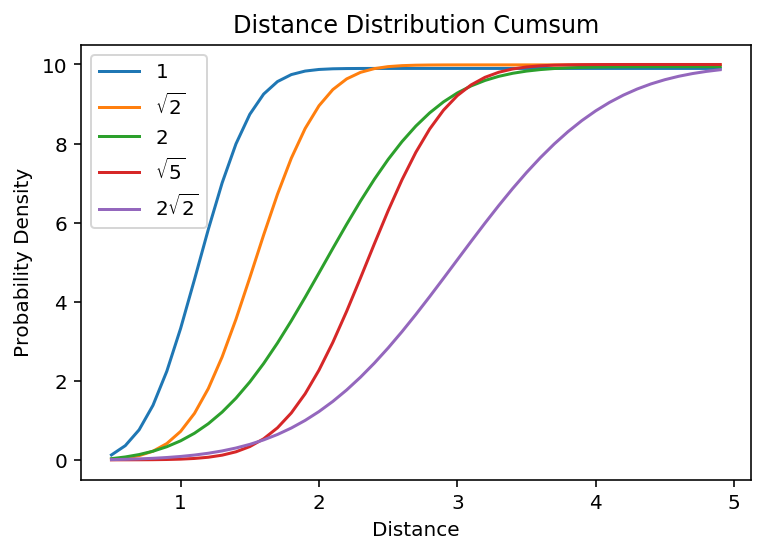

In [5]:
# 设定 x 轴前两个数字是 X 轴的开始和结束，第三个数字表示步长，或者区间的间隔长度
x = np.arange(0.5,5,0.1) 

y = normfun(x, meanStd[1][0], meanStd[1][1])
plt.plot(x,y.cumsum(),label=r'$1$')

y = normfun(x, meanStd[math.sqrt(2)][0], meanStd[math.sqrt(2)][1])
plt.plot(x,y.cumsum(),label=r'$\sqrt{2}$')

y = normfun(x, meanStd[2][0], meanStd[2][1])
plt.plot(x,y.cumsum(),label=r'$2$')

y = normfun(x, meanStd[math.sqrt(5)][0], meanStd[math.sqrt(5)][1])
plt.plot(x,y.cumsum(),label=r'$\sqrt{5}$')

y = normfun(x, meanStd[2*math.sqrt(2)][0], meanStd[2*math.sqrt(2)][1])
plt.plot(x,y.cumsum(),label=r'$2\sqrt{2}$')

plt.title('Distance Distribution Cumsum')
plt.xlabel('Distance')
plt.ylabel('Probability Density')
plt.legend()
#输出
# plt.savefig("./results/NormalCurve/DistanceDistributionCumsum.png")
plt.show()

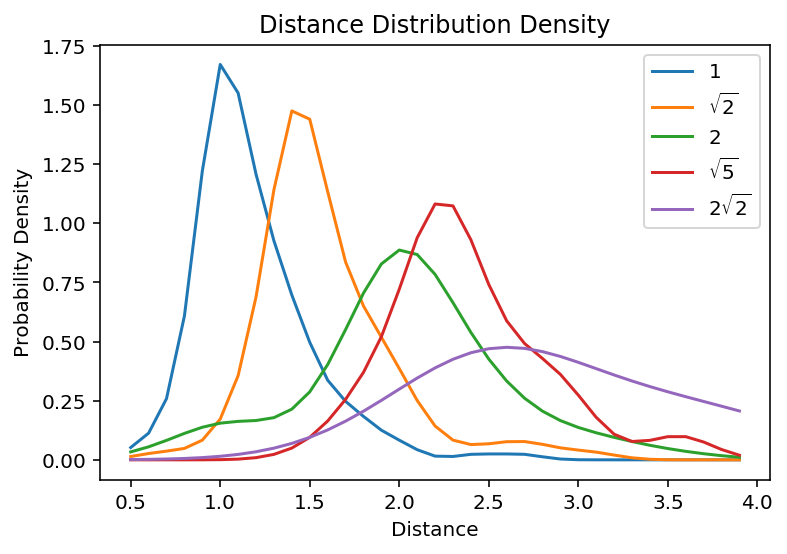

In [6]:
# y = realData[0]
# print(y)
# density = stats.kde.gaussian_kde(y)
# 设定 x 轴前两个数字是 X 轴的开始和结束，第三个数字表示步长，或者区间的间隔长度
x = np.arange(0.5,4,0.1) 
y = realData[1]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x),label=r'$1$')

y = realData[math.sqrt(2)]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x),label=r'$\sqrt{2}$')

y = realData[2]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x),label=r'$2$')

y = realData[math.sqrt(5)]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x),label=r'$\sqrt{5}$')

y = realData[2 * math.sqrt(2)]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x),label=r'$2\sqrt{2}$')

plt.title('Distance Distribution Density')
plt.xlabel('Distance')
plt.ylabel('Probability Density')
plt.legend()
#输出
# plt.savefig("./results/NormalCurve/DistanceDistributionDensity.png")
plt.show()

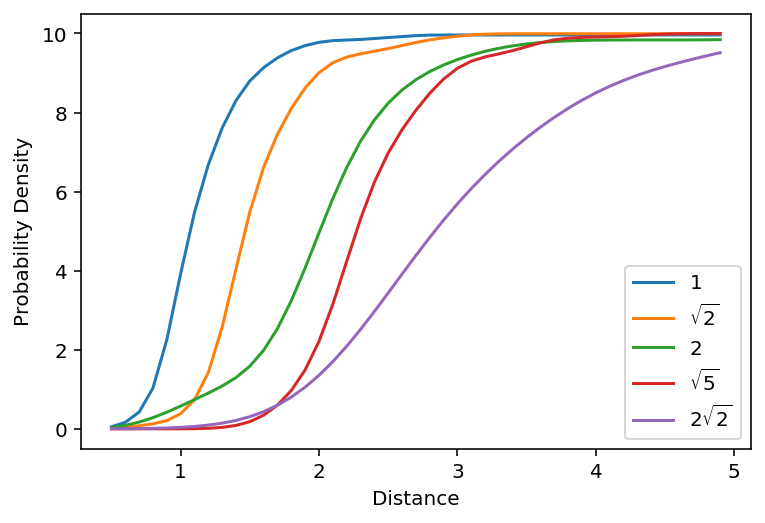

In [12]:
# y = realData[0]
# print(y)
# density = stats.kde.gaussian_kde(y)
# 设定 x 轴前两个数字是 X 轴的开始和结束，第三个数字表示步长，或者区间的间隔长度
x = np.arange(0.5,5,0.1)
y = realData[1]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x).cumsum(),label=r'$1$')

y = realData[math.sqrt(2)]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x).cumsum(),label=r'$\sqrt{2}$')

y = realData[2]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x).cumsum(),label=r'$2$')

y = realData[math.sqrt(5)]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x).cumsum(),label=r'$\sqrt{5}$')

y = realData[2 * math.sqrt(2)]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x).cumsum(),label=r'$2\sqrt{2}$')

plt.title('Distance Distribution Density Cumsum')
plt.xlabel('Distance')
plt.ylabel('Probability Density')
plt.legend()
#输出
# plt.savefig("./results/NormalCurve/DistanceDistributionDensityCumsum.png")
plt.show()

In [8]:
data = pd.read_csv("总表.csv")
dataAngle = data[['standard angles','actual angles']]
groupByStandardA = data.groupby('standard angles', sort=True)
meanstdAngles = {}
realDataAngles = {}
for name, groupData in groupByStandardA:
#     print(name)
    mean = np.array(groupData['actual angles']).mean()
    std = np.array(groupData['actual angles']).std(ddof=1)
    realDataAngles[name] = groupData['actual angles']
    meanstdAngles[name] = [mean, std]
for key in realDataAngles.keys():
    print(f'{key}:{len(realDataAngles[key])}')

-1.0:87
18.43494882292197:48
26.565051177077994:29
36.869897645844006:4
44.99999999999999:73
45.00000000000001:1
53.13010235415597:12
63.43494882292201:38
71.56505117707798:11
89.99999999999999:11
90.00000000000001:87
116.565051177078:23
135.00000000000003:20


/Users/xym/miniconda3/envs/pytorch/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/xym/miniconda3/envs/pytorch/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


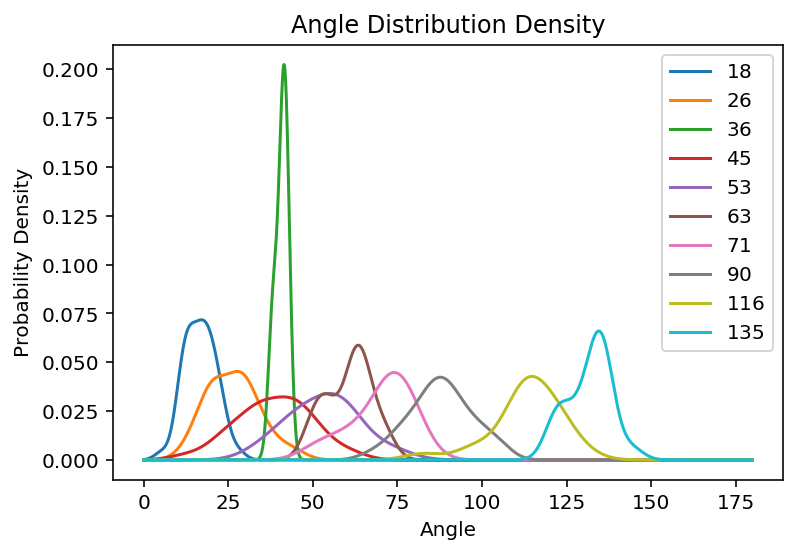

In [9]:
x = np.arange(0,180,0.1) 
y = realDataAngles[18.43494882292197]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x),label=r'$18$')

y = realDataAngles[26.565051177077994]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x),label=r'$26$')

y = realDataAngles[36.869897645844006]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x),label=r'$36$')

y = realDataAngles[44.99999999999999]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x),label=r'$45$')

# y = realDataAngles[45.00000000000001]
# density = stats.kde.gaussian_kde(y)
# plt.plot(x,density(x),label=r'$45$')

y = realDataAngles[53.13010235415597]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x),label=r'$53$')

y = realDataAngles[63.43494882292201]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x),label=r'$63$')

y = realDataAngles[71.56505117707798]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x),label=r'$71$')

# y = realDataAngles[89.99999999999999]
# density = stats.kde.gaussian_kde(y)
# plt.plot(x,density(x),label=r'$90$')

y = realDataAngles[90.00000000000001]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x),label=r'$90$')

y = realDataAngles[116.565051177078]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x),label=r'$116$')

y = realDataAngles[135.00000000000003]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x),label=r'$135$')


plt.title('Angle Distribution Density')
plt.xlabel('Angle')
plt.ylabel('Probability Density')
plt.legend()
#输出
# plt.savefig("./results/NormalCurve/AngleDistributionDensity.png")
plt.show()

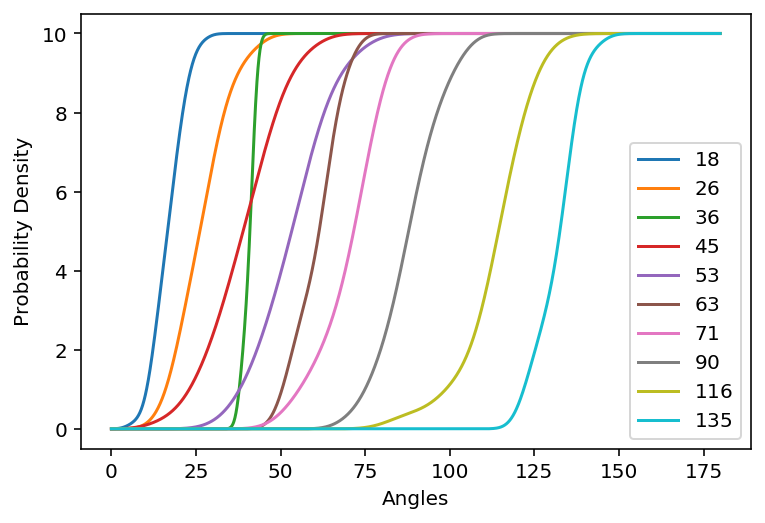

In [18]:
x = np.arange(0,180,0.1) 
y = realDataAngles[18.43494882292197]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x).cumsum(),label=r'$18$')

y = realDataAngles[26.565051177077994]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x).cumsum(),label=r'$26$')

y = realDataAngles[36.869897645844006]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x).cumsum(),label=r'$36$')

y = realDataAngles[44.99999999999999]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x).cumsum(),label=r'$45$')

# y = realDataAngles[45.00000000000001]
# density = stats.kde.gaussian_kde(y)
# plt.plot(x,density(x),label=r'$45$')

y = realDataAngles[53.13010235415597]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x).cumsum(),label=r'$53$')

y = realDataAngles[63.43494882292201]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x).cumsum(),label=r'$63$')

y = realDataAngles[71.56505117707798]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x).cumsum(),label=r'$71$')

# y = realDataAngles[89.99999999999999]
# density = stats.kde.gaussian_kde(y)
# plt.plot(x,density(x),label=r'$90$')

y = realDataAngles[90.00000000000001]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x).cumsum(),label=r'$90$')

y = realDataAngles[116.565051177078]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x).cumsum(),label=r'$116$')

y = realDataAngles[135.00000000000003]
density = stats.kde.gaussian_kde(y)
plt.plot(x,density(x).cumsum(),label=r'$135$')

# plt.title('Angle Distribution Density Cumsum')
plt.xlabel('Angles')
plt.ylabel('Probability Density')
plt.legend()
#输出
plt.savefig("AngleDistributionDensityCumsum.png")
plt.show()

In [13]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

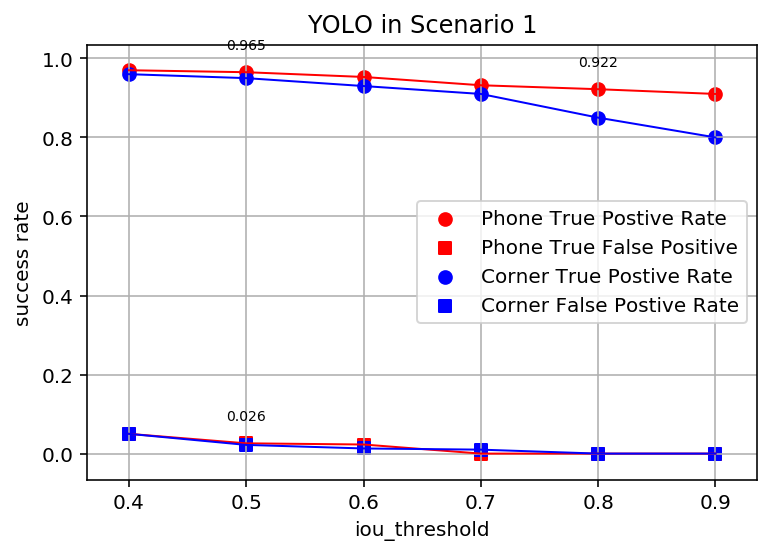

In [15]:
#分别存放所有点的横坐标和纵坐标，一一对应
yoloResult = pd.read_csv("../../essay/数据整理/yolotest.csv")
x_list = yoloResult.iou_threshold
phone_ap_list = yoloResult.phone_AP
phone_recall_list = yoloResult.phone_Recall
corner_ap_list = yoloResult.corner_AP
corner_recall_list = yoloResult.corner_Recall

#创建图并命名
plt.figure('yolo in scenario 1')
plt.title('YOLO in Scenario 1')
ax = plt.gca()
#设置x轴、y轴名称
ax.set_xlabel('iou_threshold')
ax.set_ylabel('success rate')


p1 = ax.scatter(x_list, phone_ap_list, c='r', s=40, alpha=1)
p2 = ax.plot(x_list, phone_ap_list, color='r', linewidth=1, alpha=1)
p3 = ax.scatter(x_list, phone_recall_list,c='r', marker='s', s=40, alpha=1)
p4 = ax.plot(x_list, phone_recall_list, color='r', linewidth=1, alpha=1) 
# l1 = plt.legend([p1, p3], ["Phone AP", "Phone Recall"], loc='lower left')

p5 = ax.scatter(x_list, corner_ap_list, c='b', s=40, alpha=1)
p6 = ax.plot(x_list, corner_ap_list, color='b', linewidth=1, alpha=1)
p7 = ax.scatter(x_list, corner_recall_list,c='b', marker='s', s=40, alpha=1)
p8 = ax.plot(x_list, corner_recall_list, color='b', linewidth=1, alpha=1) 
l2 = plt.legend([p1, p3, p5, p7], ["Phone True Postive Rate", "Phone True False Positive", "Corner True Postive Rate", "Corner False Postive Rate"], loc='best')
for a,b in zip(x_list,phone_ap_list):
    if a != 0.5 and a != 0.8: continue
    plt.text(a, b+0.05,'%.3f' % b, ha='center', va= 'bottom',fontsize=7)
for a,b in zip(x_list,phone_recall_list):
    if a != 0.5: continue
    plt.text(a, b+0.05,'%.3f' % b, ha='center', va= 'bottom',fontsize=7)
plt.grid()
plt.show()

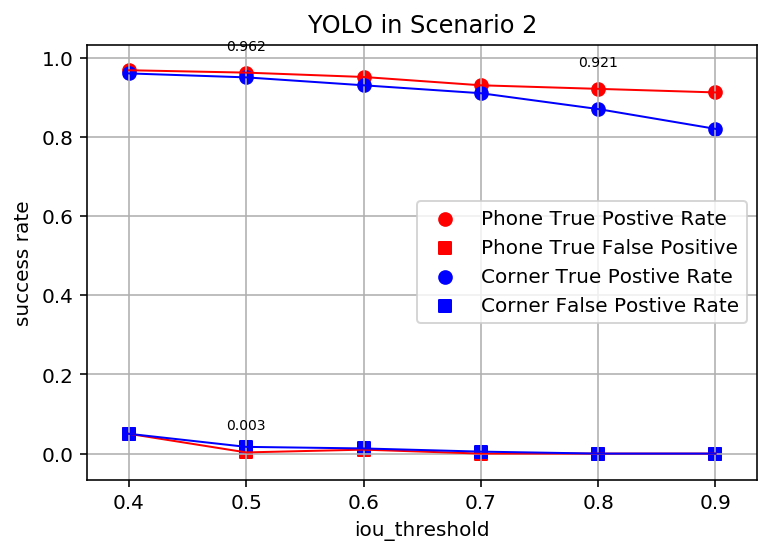

In [16]:
#分别存放所有点的横坐标和纵坐标，一一对应
yoloResult = pd.read_csv("../../essay/数据整理/yolotestback.csv")
x_list = yoloResult.iou_threshold
phone_ap_list = yoloResult.phone_AP
phone_recall_list = yoloResult.phone_Recall
corner_ap_list = yoloResult.corner_AP
corner_recall_list = yoloResult.corner_Recall

#创建图并命名
plt.figure('yolo in scenario 2')
plt.title('YOLO in Scenario 2')
ax = plt.gca()
#设置x轴、y轴名称
ax.set_xlabel('iou_threshold')
ax.set_ylabel('success rate')


p1 = ax.scatter(x_list, phone_ap_list, c='r', s=40, alpha=1)
p2 = ax.plot(x_list, phone_ap_list, color='r', linewidth=1, alpha=1)
p3 = ax.scatter(x_list, phone_recall_list,c='r', marker='s', s=40, alpha=1)
p4 = ax.plot(x_list, phone_recall_list, color='r', linewidth=1, alpha=1) 
# l1 = plt.legend([p1, p3], ["Phone AP", "Phone Recall"], loc='lower left')

p5 = ax.scatter(x_list, corner_ap_list, c='b', s=40, alpha=1)
p6 = ax.plot(x_list, corner_ap_list, color='b', linewidth=1, alpha=1)
p7 = ax.scatter(x_list, corner_recall_list,c='b', marker='s', s=40, alpha=1)
p8 = ax.plot(x_list, corner_recall_list, color='b', linewidth=1, alpha=1) 
l2 = plt.legend([p1, p3, p5, p7], ["Phone True Postive Rate", "Phone True False Positive", "Corner True Postive Rate", "Corner False Postive Rate"], loc='best')
for a,b in zip(x_list,phone_ap_list):
    if a != 0.5 and a != 0.8: continue
    plt.text(a, b+0.05,'%.3f' % b, ha='center', va= 'bottom',fontsize=7)
for a,b in zip(x_list,phone_recall_list):
    if a != 0.5: continue
    plt.text(a, b+0.05,'%.3f' % b, ha='center', va= 'bottom',fontsize=7)
plt.grid()
plt.show()

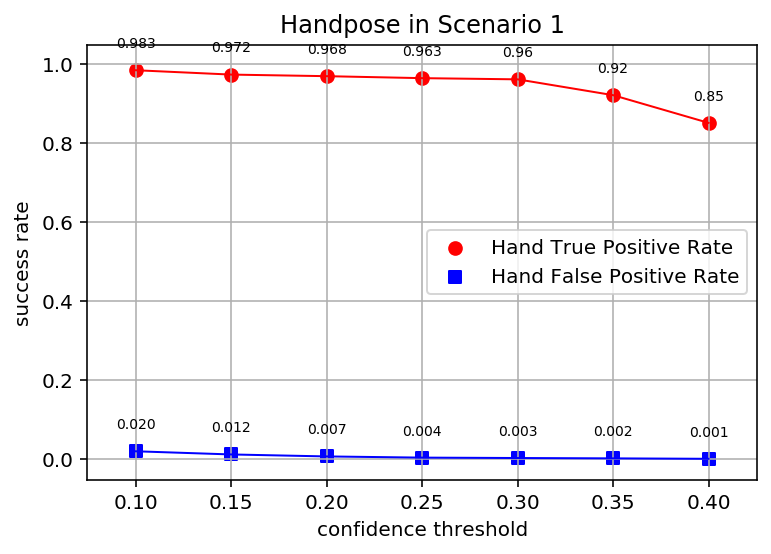

In [17]:
#分别存放所有点的横坐标和纵坐标，一一对应
handposeResult = pd.read_csv("../../essay/数据整理/handpose.csv")
x_list = handposeResult.confidence_threshold
hand_ap_list = handposeResult.AP
hand_recall_list = handposeResult.Recall

#创建图并命名
plt.figure('Handpose in Scenario 1')
plt.title('Handpose in Scenario 1')
ax = plt.gca()
#设置x轴、y轴名称
ax.set_xlabel('confidence threshold')
ax.set_ylabel('success rate')


p1 = ax.scatter(x_list, hand_ap_list, c='r', s=40, alpha=1)
p2 = ax.plot(x_list, hand_ap_list, color='r', linewidth=1, alpha=1)
p3 = ax.scatter(x_list, hand_recall_list,c='b', marker='s', s=40, alpha=1)
p4 = ax.plot(x_list, hand_recall_list, color='b', linewidth=1, alpha=1) 
l1 = plt.legend([p1, p3], ["Hand True Positive Rate", "Hand False Positive Rate"], loc='best')
for a,b in zip(x_list,hand_ap_list):
    plt.text(a, b+0.05,"{}".format(b), ha='center', va= 'bottom',fontsize=7)
for a,b in zip(x_list,hand_recall_list):
    plt.text(a, b+0.05,'%.3f' % b, ha='center', va= 'bottom',fontsize=7)
plt.grid()
plt.show()

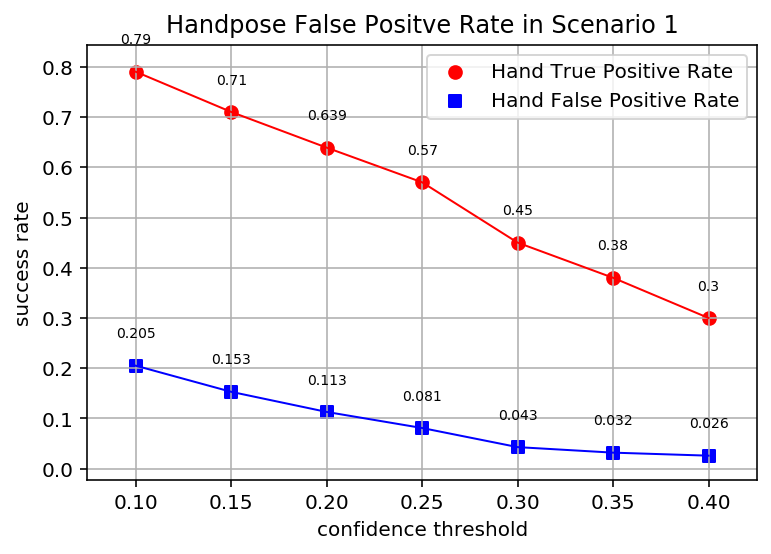

In [18]:
#分别存放所有点的横坐标和纵坐标，一一对应
handposeResult = pd.read_csv("../../essay/数据整理/handposeback.csv")
x_list = handposeResult.confidence_threshold
hand_ap_list = handposeResult.AP
hand_recall_list = handposeResult.Recall
# print(hand_p)

#创建图并命名
plt.figure('Handpose False Positve Rate in Scenario 1')
plt.title('Handpose False Positve Rate in Scenario 1')
ax = plt.gca()
#设置x轴、y轴名称
ax.set_xlabel('confidence threshold')
ax.set_ylabel('success rate')

p1 = ax.scatter(x_list, hand_ap_list, c='r', s=40, alpha=1)
p2 = ax.plot(x_list, hand_ap_list, color='r', linewidth=1, alpha=1)
p3 = ax.scatter(x_list, hand_recall_list,c='b', marker='s', s=40, alpha=1)
p4 = ax.plot(x_list, hand_recall_list, color='b', linewidth=1, alpha=1) 
l1 = plt.legend([p1, p3], ["Hand True Positive Rate", "Hand False Positive Rate"], loc='best')
for a,b in zip(x_list,hand_ap_list):
    plt.text(a, b+0.05,"{}".format(b), ha='center', va= 'bottom',fontsize=7)
for a,b in zip(x_list,hand_recall_list):
    plt.text(a, b+0.05,'%.3f' % b, ha='center', va= 'bottom',fontsize=7)
plt.grid()
plt.show()

In [2]:
startTimeCDF = pd.read_csv("../../essay/数据整理/StartTimeCDF.csv")

In [8]:
time = startTimeCDF.time.to_list()

In [12]:
from scipy import signal

In [26]:
tmp_smooth = signal.savgol_filter(time,21,2)

In [27]:
startTimeCDF.time=tmp_smooth

In [28]:
startTimeCDF.to_csv("startTimeCDF.csv")